#     Gaussian Process Regression

Let's begin with importing the required libraries:

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    WhiteKernel,
    ExpSineSquared
)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# for saving data files
import pandas as pd

In [100]:
# Initialize X/Y with hand/end-eff data, respectively, from first run
set_num=0
run = 1

# Uncomment the next line when running on Ubuntu, the line following if running on Windows
# data = np.load("../NonAnthroHands_User_Study/data/positions/positions_"+str(set_num)+"_data/DTW_processed_data/data_"+str(set_num)+"_"+str(run)+".npz")
data = np.load("..\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(set_num)+"_data\\DTW_processed_data\\data_"+str(set_num)+"_"+str(run)+".npz")
print(sorted(data.files))

endpt = -50 # Empirically determined end of data (cutting off trailing ends)
stepsize = 10
x = np.hstack((data['hand_pos_aligned'][0:endpt:stepsize], data['hand_rot_aligned'][0:endpt:stepsize]))
y = data['joint_data_aligned'][0:endpt:stepsize]

# Concatenate data for the rest of the runs, leaving one out to be the test set
setskipval = 0
runskipval = 6 # Identify the run that will serve as the test dataset

for set_num in range(0,9):
#     print("set_num = "+str(set_num))
#     if set_num==setskipval:
#         continue
#     else:
        for run in range (1,11):
            if set_num==setskipval and run==runskipval : 
                continue
            else :
    #             print("run="+str(run))
    #             data = np.load("../NonAnthroHands_User_Study/data/positions/positions_"+str(set_num)+"_data/DTW_processed_data/data_"+str(set_num)+"_"+str(run)+".npz")
                data = np.load("..\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(set_num)+"_data\\DTW_processed_data\\data_"+str(set_num)+"_"+str(run)+".npz")
                x_temp = np.hstack((data['hand_pos_aligned'][0:endpt:stepsize], data['hand_pos_aligned'][0:endpt:stepsize]))
                y_temp = data['joint_data_aligned'][0:endpt:stepsize]
                x = np.vstack((x,x_temp))
                y = np.vstack((y,y_temp))

['end_eff_data', 'end_eff_pos_aligned', 'end_eff_rot_aligned', 'hand_data', 'hand_pos_aligned', 'hand_rot_aligned', 'joint_data_aligned', 'run', 'set_num', 'time_URDF_aligned', 'time_hand_aligned', 'time_ja_aligned', 'warp_path']


In [101]:
set_num=setskipval
run=runskipval
# data = np.load("../NonAnthroHands_User_Study/data/positions/positions_"+str(set_num)+"_data/DTW_processed_data/data_"+str(set_num)+"_"+str(run)+".npz")
data_test = np.load("..\\NonAnthroHands_User_Study\\data\\positions\\positions_"+str(set_num)+"_data\\DTW_processed_data\\data_"+str(set_num)+"_"+str(run)+".npz")
x_star = np.hstack((data_test['hand_pos_aligned'][0:endpt:stepsize], data_test['hand_rot_aligned'][0:endpt:stepsize]))
y_test = data_test['joint_data_aligned'][0:endpt:stepsize]

In [102]:
# Construction of Sklearn's Regression and Selection of the Kernel
kernel = RBF(1,(1e-3,1e4)) # + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e2))   #Good length scale limits seem to lower bound at 0.1, 0.5, or 1.0
alphaval = 1e-2
gp_regressorJ1 = GaussianProcessRegressor(kernel=kernel, alpha=alphaval, normalize_y=True)
gp_regressorJ2 = GaussianProcessRegressor(kernel=kernel, alpha=alphaval, normalize_y=True)
gp_regressorJ3 = GaussianProcessRegressor(kernel=kernel, alpha=alphaval, normalize_y=True)
gp_regressorJ4 = GaussianProcessRegressor(kernel=kernel, alpha=alphaval, normalize_y=True)
gp_regressorJ5 = GaussianProcessRegressor(kernel=kernel, alpha=alphaval, normalize_y=True)
gp_regressorJ6 = GaussianProcessRegressor(kernel=kernel, alpha=alphaval, normalize_y=True)

gp_regressorJ1.fit(x,y[:,0])
gp_regressorJ2.fit(x,y[:,1])
gp_regressorJ3.fit(x,y[:,2])
gp_regressorJ4.fit(x,y[:,3])
gp_regressorJ5.fit(x,y[:,4])
gp_regressorJ6.fit(x,y[:,5])


print(f"RBF Lengthscale: {gp_regressorJ1.kernel_}")
print(f"RBF Lengthscale: {gp_regressorJ2.kernel_}")
print(f"RBF Lengthscale: {gp_regressorJ3.kernel_}")
print(f"RBF Lengthscale: {gp_regressorJ4.kernel_}")
print(f"RBF Lengthscale: {gp_regressorJ5.kernel_}")
print(f"RBF Lengthscale: {gp_regressorJ6.kernel_}")

J1_pred_mean, J1_pred_std = gp_regressorJ1.predict(x_star, return_std=True)
J2_pred_mean, J2_pred_std = gp_regressorJ2.predict(x_star, return_std=True)
J3_pred_mean, J3_pred_std = gp_regressorJ3.predict(x_star, return_std=True)
J4_pred_mean, J4_pred_std = gp_regressorJ4.predict(x_star, return_std=True)
J5_pred_mean, J5_pred_std = gp_regressorJ5.predict(x_star, return_std=True)
J6_pred_mean, J6_pred_std = gp_regressorJ6.predict(x_star, return_std=True)


# df = pd.DataFrame(y_pred_mean)
# df.to_csv('trained_endeff_mean.csv')
# df = pd.DataFrame(y_pred_std)
# df.to_csv('trained_endeff_std.csv')


RBF Lengthscale: RBF(length_scale=0.0191)
RBF Lengthscale: RBF(length_scale=0.0302)
RBF Lengthscale: RBF(length_scale=0.0209)
RBF Lengthscale: RBF(length_scale=0.0242)
RBF Lengthscale: RBF(length_scale=0.0218)
RBF Lengthscale: RBF(length_scale=1e+04)


(44, 6)
(44, 6)


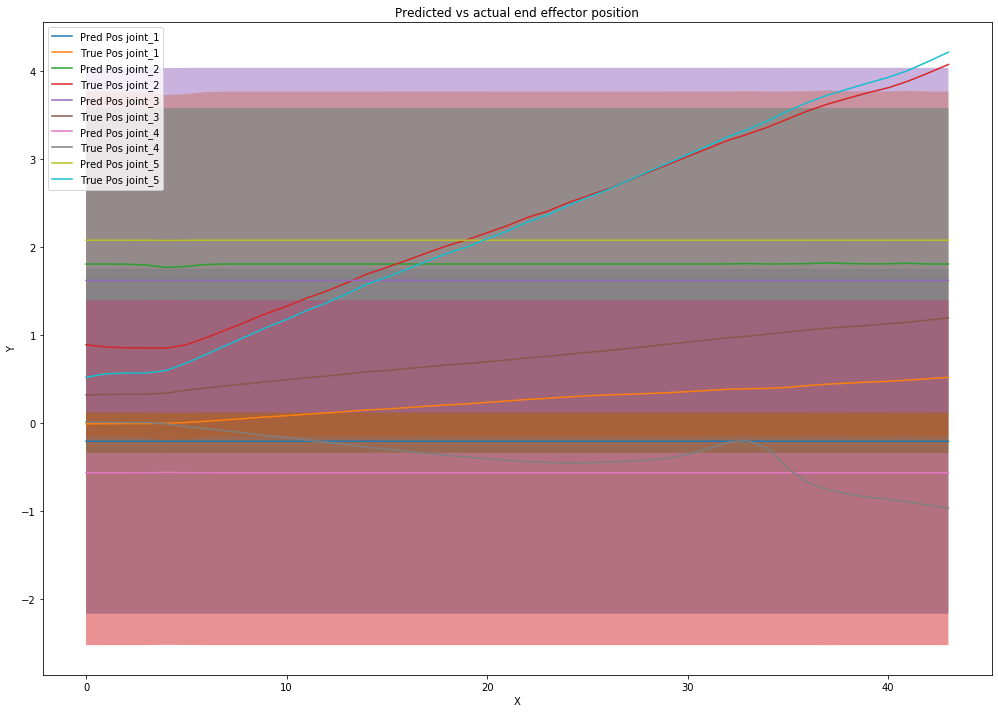

In [103]:
f = plt.figure(figsize=[17.0, 12.0])

ax = f.add_subplot(111)
# labels = ('X','Y','Z')
labels = ('joint_1','joint_2','joint_3', 'joint_4', 'joint_5', 'joint_6')
errorlabels = ('One STD')
it=0

pred_vals = np.vstack((J1_pred_mean, J2_pred_mean, J3_pred_mean, J4_pred_mean, J5_pred_mean, J6_pred_mean)).T
std_vals  = np.vstack((J1_pred_std , J2_pred_std , J3_pred_std , J4_pred_std , J5_pred_std , J6_pred_std )).T

print(pred_vals.shape)
print(std_vals.shape)

for i in range(0,5):
    ax.plot(pred_vals[:,i],label='Pred Pos '+labels[i])
#     if i==3:
#         ax.plot(np.squeeze(y_pred_mean.T[i]) + y_pred_std, 'k--',label='One STD')
#     else:
#         ax.plot(np.squeeze(y_pred_mean.T[i]) + y_pred_std, 'k--')
#     ax.plot(np.squeeze(y_pred_mean.T[i]) - y_pred_std, 'k--')
    plt.fill_between(
        range(0,len(y_pred_std)),
        pred_vals[:,i] - 1.96 * std_vals[:,i],
        pred_vals[:,i] + 1.96 * std_vals[:,i],
        alpha=0.5,
#         label=r"95% confidence interval",
    )
    ax.plot(y_test[:].T[i],label='True Pos '+labels[i])
    
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_title('Predicted vs actual end effector position');
ax.legend();
plt.savefig('Error_Train08_LeaveOneOut6_Alpha1e-2.png')
plt.show()
plt.close('all')

In [13]:
J1_pred_mean

array([0.01064222, 0.00988938, 0.00839877, 0.01427198, 0.02516961,
       0.03260685, 0.04796772, 0.07383405, 0.09876696, 0.12576639,
       0.14447713, 0.16632028, 0.1788891 , 0.19307185, 0.20678981,
       0.22101622, 0.23902464, 0.25378561, 0.26811208, 0.28099935,
       0.29221388, 0.30543663, 0.31907286, 0.33439601, 0.35013437,
       0.36187254, 0.37032831, 0.377466  , 0.38282624, 0.38717789,
       0.38962655, 0.39144741, 0.39333588, 0.3977498 , 0.40578465,
       0.42257764, 0.44219611, 0.46914636, 0.49819933, 0.51858514,
       0.52582036, 0.52251737, 0.5097356 , 0.49644754])

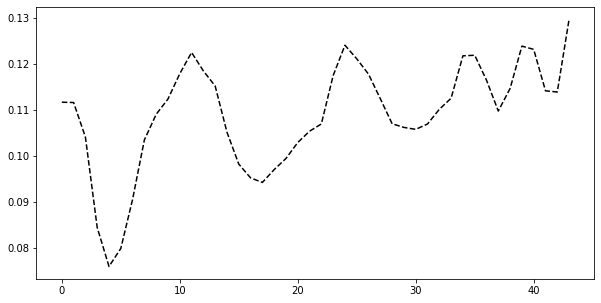

In [23]:
f = plt.figure(figsize=[10.0, 5.0])
ax = f.add_subplot(111)
ax.plot(y_pred_std, 'k--')

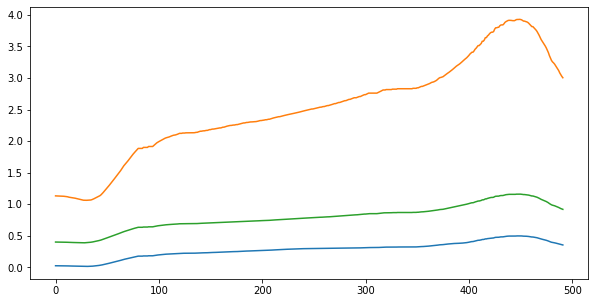

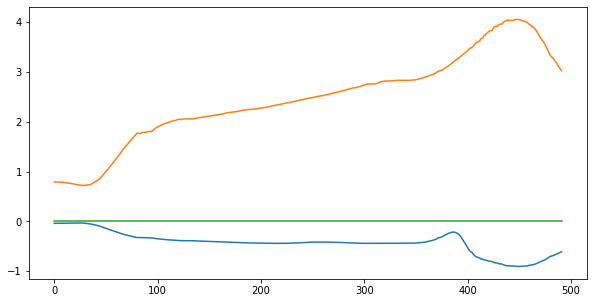

In [125]:
f = plt.figure(figsize=[10.0, 5.0])
ax = f.add_subplot(111)
# ax = plt.axes(projection='3d')
ax.plot(y_pred_mean[:,0])
ax.plot(y_pred_mean[:,1])
ax.plot(y_pred_mean[:,2])
plt.show()
f = plt.figure(figsize=[10.0, 5.0])
ax = f.add_subplot(111)
# ax = plt.axes(projection='3d')
ax.plot(y_pred_mean[:,3])
ax.plot(y_pred_mean[:,4])
ax.plot(y_pred_mean[:,5])

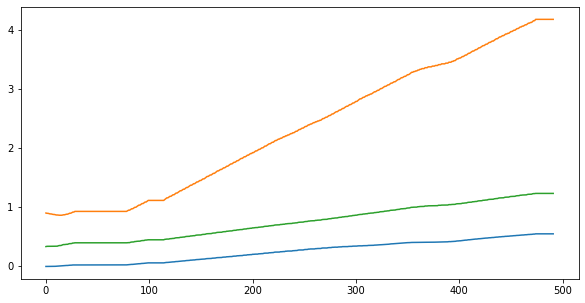

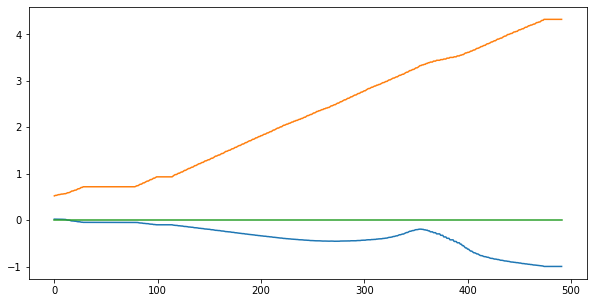

In [126]:
f = plt.figure(figsize=[10.0, 5.0])
ax = f.add_subplot(111)
# ax = plt.axes(projection='3d')
ax.plot(y_test[:,0])
ax.plot(y_test[:,1])
ax.plot(y_test[:,2])
plt.show()
f = plt.figure(figsize=[10.0, 5.0])
ax = f.add_subplot(111)
# ax = plt.axes(projection='3d')
ax.plot(y_test[:,3])
ax.plot(y_test[:,4])
ax.plot(y_test[:,5])